In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library(dplyr) 
library(ggplot2)
library(ggpmisc)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")

# assgin clusters to cell types

In [5]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

# Cell type analysis in each condition

In [6]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

# Dataframe for analyzing hormonal receptor and DEG per cluster

In [7]:
celltype<- vector(mode="character")
for (i in 1:dim(MPOA.integrated@meta.data)[1]){
celltype[i]<-new.ident[as.numeric(MPOA.integrated@meta.data$integrated_snn_res.0.8[i])]} # do not need +1
MPOA.integrated@meta.data$celltype<-celltype

# Male

In [6]:
#First make data frame
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

Cell_number<- data.frame("type" =Cell_type)

AM_Cast<-vector(mode="numeric", length=0)

AM_cell<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){
AM_Cast_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AM_over_Cast/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)  
AM_Cast[i]<-dim(AM_Cast_gene)[1]  

AM_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))[1]  
  }
Cell_number$AM_cell<-AM_cell
Cell_number$AM_Cast<-AM_Cast


In [9]:
steroid_receptor<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/GO_term_summary_steroid_hormone_receptor_activity.xlsx", 1,stringsAsFactors = FALSE)$Symbol
nuclear_receptor<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/GO_term_summary_nuclear_receptor_activity.xlsx", 1,stringsAsFactors = FALSE)$Symbol

In [11]:
#201116
steroid_receptor<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/GO_term_summary_steroid_hormone_receptor_activity.xlsx", 1,stringsAsFactors = FALSE)$Symbol
#nuclear_receptor<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/GO_term_summary_nuclear_receptor_activity.xlsx", 1,stringsAsFactors = FALSE)$Symbol
#NR<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/GO_term_summary_20201027_181629.xlsx", 1,stringsAsFactors = FALSE)$Symbol
HR_binding<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/GO_term_summary_20201117_114940_hormone_receptor_binding.xlsx", 1,stringsAsFactors = FALSE)$Symbol
genes<-unique(c(steroid_receptor,nuclear_receptor,HR_binding))
#genes<-unique(c(steroid_receptor,nuclear_receptor))
genes<-intersect(genes,rownames(MPOA.integrated@assays$RNA))

In [12]:
threshold<-10
temp<-as.matrix(MPOA.integrated@assays$RNA@data)
notzero<-numeric()
for(i in 1:dim(temp)[1]){
if(100*sum(temp[i,]>0)/dim(temp)[1] >threshold){
    notzero<-c(notzero,i)
}else{
    notzero<-notzero
}
    }

In [13]:
length(genes)

[1] 207

In [14]:

genes<-intersect(genes,rownames(MPOA.integrated@assays$RNA@data)[notzero])

In [15]:
length(genes)

[1] 129

In [16]:
for (n in 1:length(genes)){ 
temp<-vector(mode="numeric", length=0)
for (i in 1:dim(Cell_number)[1]){ 
temp[i]<-100*sum(MPOA.integrated@assays$RNA[genes[n],rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))
 }
    Cell_number[,genes[n]]<-temp}

In [17]:
#201118
Cell_number_Vgat<-subset(Cell_number, type %in% c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20"))
Cell_number_Vglu<-subset(Cell_number, type %in% c("Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12"))

In [19]:
Vgat<-subset(MPOA.integrated,cells=c(Vgat1_barcode,Vgat2_barcode,Vgat3_barcode,Vgat4_barcode,Vgat5_barcode,Vgat6_barcode,Vgat7_barcode,Vgat8_barcode,Vgat9_barcode,Vgat10_barcode,Vgat11_barcode,Vgat12_barcode,Vgat13_barcode,Vgat14_barcode,Vgat15_barcode,Vgat16_barcode,Vgat17_barcode,Vgat18_barcode,Vgat19_barcode,Vgat20_barcode))

In [20]:
Hormone<- data.frame("gene" =genes)
p<-vector(mode="numeric", length=0)
r_sq<-vector(mode="numeric", length=0)
prop<-vector(mode="numeric", length=0)
for(i in 1:length(genes)){
   temp<- lm(Cell_number_Vgat[,genes[i]] ~ AM_Cast, data = Cell_number_Vgat)
    p[i]<- -log(summary(temp)$coef[2,4])
    r_sq[i]<- summary(temp)$adj.r.squared
    prop[i]<- 100*sum(Vgat@assays$RNA[genes[i],rownames(subset(Vgat@meta.data,stim=="AM"))]>0)/length(rownames(subset(Vgat@meta.data,stim=="AM" )))
 }
Hormone$p<-p
Hormone$r_sq<- r_sq
Hormone$prop<-prop

In [21]:
Hormone<-Hormone[order(-Hormone$r_sq),]
Hormone_15<-subset(Hormone,prop>15)

In [24]:
saveRDS(Hormone,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/maleDEG_correlation_with_allhormonoe_genes.rds")

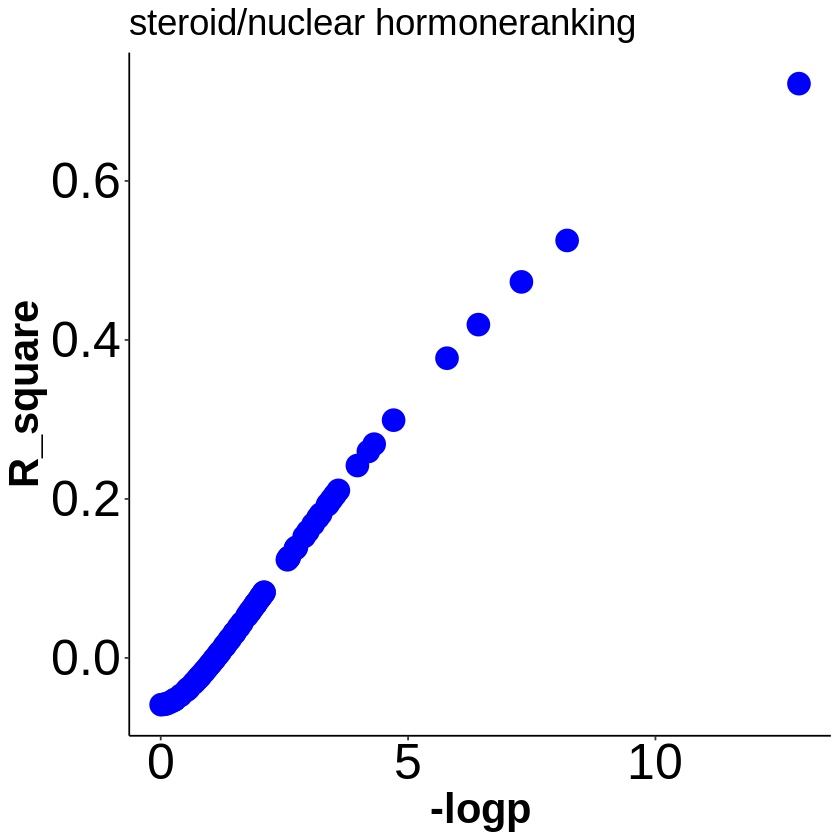

In [30]:
ggplot(Hormone,aes(x=p,y=r_sq))+geom_point(size=6,color='blue') +xlab("-logp")+ylab("R_square")+theme(axis.text.x=element_text(size=30, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=30, hjust = 1,colour = "black"),axis.title.y=element_text(size=25,face="bold"),axis.title.x=element_text(size=25,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("steroid/nuclear hormoneranking")

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/steroid_hormone_receptor_male_comparisoins_Vgat_10.pdf",width=10,height=10)

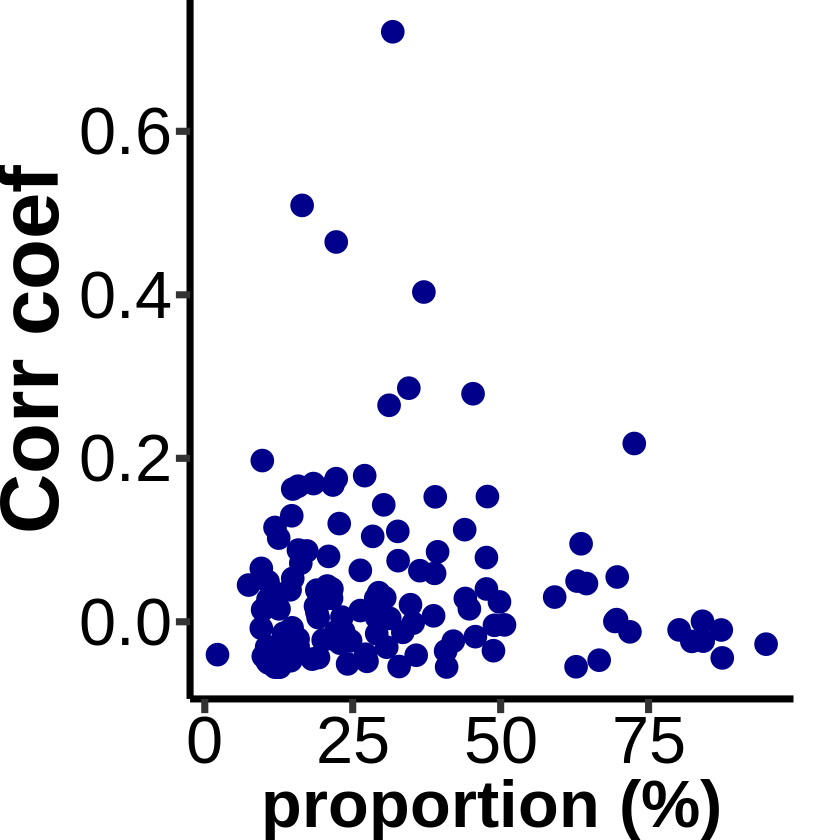

In [19]:
ggplot(Hormone,aes(x=prop,y=r_sq))+geom_point(size=6,color='darkblue') +xlab("proportion (%)")+ylab("Corr coef")+theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(0, 28, 0, 0))

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/allhormone_receptor_male_comparisoins_Vgat_prop_10Fig1.pdf",width=5,height=6)

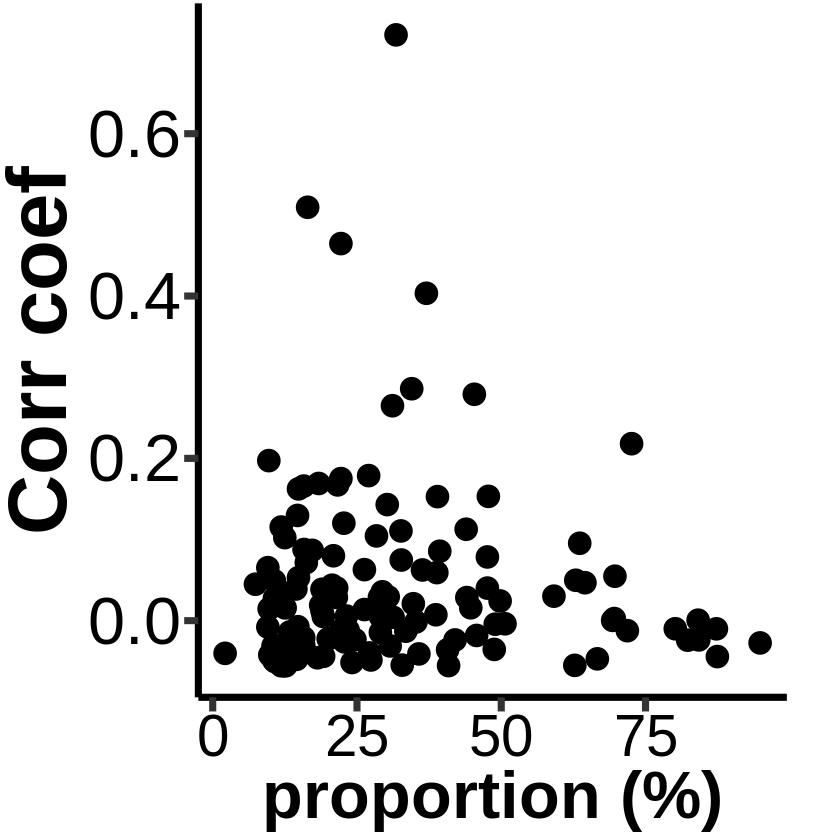

In [22]:
ggplot(Hormone,aes(x=prop,y=r_sq))+geom_point(size=6,color='black') +xlab("proportion (%)")+ylab("Corr coef")+theme(axis.text.x=element_text(size=35, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(2, 32, 5, 5))

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/allhormone_receptor_male_comparisoins_Vgat_prop_10_black_Fig1.pdf",width=6,height=6,paper="letter")

In [26]:
write.xlsx2(Hormone,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/all_hormone_receptor_male_comparisoins_Vgat_prop_10.xlsx")

In [23]:
Hormone

,gene,p,r_sq,prop
,<fct>,<dbl>,<dbl>,<dbl>
14,Pgr,13.549950,0.72178437,31.769361
2,Esr1,8.307257,0.50936730,16.449972
83,Nrip1,7.487281,0.46462629,22.215941
44,Ets2,6.460992,0.40339710,37.026569
81,Ncor2,4.723049,0.28578076,34.482759
22,Ar,4.629565,0.27895512,45.336348
9,Nr2f2,4.438490,0.26485029,31.147541
34,Calr,3.823228,0.21808073,72.583380
8,Nr2f1,3.556529,0.19720813,9.723007


In [56]:
head(Hormone_15,15)

,gene,p,r_sq,prop
,<fct>,<dbl>,<dbl>,<dbl>
4966,Pgr,12.901212,0.7223659,31.76936
2754,Por,9.884730,0.6072710,26.56868
970,Rbck1,9.727522,0.6001551,26.68174
3885,L3mbtl3,8.770711,0.5541270,15.26286
2530,Naaa,8.764648,0.5538200,16.33691
4921,Pcdh20,8.749204,0.5530369,17.86320
2985,Avl9,8.413193,0.5356764,35.33070
1426,Gpm6b,8.323531,0.5309381,33.74788
3842,Esr1,8.214939,0.5251387,16.44997


In [32]:
write.xlsx2(Hormone,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/steroid_hormone_receptor_male_comparisoins_Vgat_prop_10.xlsx")

# Female

In [24]:
#First make data frame
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

Cell_number<- data.frame("type" =Cell_type)

AF_OVX<-vector(mode="numeric", length=0)

AF_cell<-vector(mode="numeric", length=0)
for (i in 1:dim(Cell_number)[1]){
AF_OVX_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AF_over_OVX/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)  
AF_OVX[i]<-dim(AF_OVX_gene)[1]  

AF_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))[1]   }
Cell_number$AF_cell<-AF_cell
Cell_number$AF_OVX<-AF_OVX

In [21]:
steroid_receptor<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/GO_term_summary_steroid_hormone_receptor_activity.xlsx", 1,stringsAsFactors = FALSE)$Symbol
nuclear_receptor<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/GO_term_summary_nuclear_receptor_activity.xlsx", 1,stringsAsFactors = FALSE)$Symbol
#201028 include this
NR<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/GO_term_summary_20201027_181629.xlsx", 1,stringsAsFactors = FALSE)$Symbol
genes<-unique(c(steroid_receptor,nuclear_receptor,NR))
genes<-intersect(genes,rownames(MPOA.integrated@assays$RNA))

In [25]:
#201116
steroid_receptor<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/GO_term_summary_steroid_hormone_receptor_activity.xlsx", 1,stringsAsFactors = FALSE)$Symbol
#nuclear_receptor<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/GO_term_summary_nuclear_receptor_activity.xlsx", 1,stringsAsFactors = FALSE)$Symbol
#NR<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/GO_term_summary_20201027_181629.xlsx", 1,stringsAsFactors = FALSE)$Symbol
HR_binding<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/GO_term_summary_20201117_114940_hormone_receptor_binding.xlsx", 1,stringsAsFactors = FALSE)$Symbol
genes<-unique(c(steroid_receptor,nuclear_receptor,HR_binding))
#genes<-unique(c(steroid_receptor,nuclear_receptor))
genes<-intersect(genes,rownames(MPOA.integrated@assays$RNA))

In [26]:
#for all the genes
#genes<-unique(rownames(MPOA.integrated@assays$RNA))

In [27]:
threshold<-10
temp<-as.matrix(MPOA.integrated@assays$RNA@data)
notzero<-numeric()
for(i in 1:dim(temp)[1]){
if(100*sum(temp[i,]>0)/dim(temp)[1] >threshold){
    notzero<-c(notzero,i)
}else{
    notzero<-notzero
}
    }

In [28]:
genes<-intersect(genes,rownames(MPOA.integrated@assays$RNA@data)[notzero])
#genes<-unique(rownames(MPOA.integrated@assays$RNA@data)[notzero])

In [29]:
for (n in 1:length(genes)){ 
temp<-vector(mode="numeric", length=0)
for (i in 1:dim(Cell_number)[1]){ 
temp[i]<-100*sum(MPOA.integrated@assays$RNA[genes[n],rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))
 }
    Cell_number[,genes[n]]<-temp}

In [30]:
#201118
Cell_number_Vgat<-subset(Cell_number, type %in% c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20"))
Cell_number_Vglu<-subset(Cell_number, type %in% c("Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12"))

In [31]:
Vgat<-subset(MPOA.integrated,cells=c(Vgat1_barcode,Vgat2_barcode,Vgat3_barcode,Vgat4_barcode,Vgat5_barcode,Vgat6_barcode,Vgat7_barcode,Vgat8_barcode,Vgat9_barcode,Vgat10_barcode,Vgat11_barcode,Vgat12_barcode,Vgat13_barcode,Vgat14_barcode,Vgat15_barcode,Vgat16_barcode,Vgat17_barcode,Vgat18_barcode,Vgat19_barcode,Vgat20_barcode))

In [32]:
Hormone<- data.frame("gene" =genes)
p<-vector(mode="numeric", length=0)
r_sq<-vector(mode="numeric", length=0)
prop<-vector(mode="numeric", length=0)
for(i in 1:length(genes)){
   temp<- lm(Cell_number_Vgat[,genes[i]] ~ AF_OVX, data = Cell_number_Vgat)
    p[i]<- -log(summary(temp)$coef[2,4])
    r_sq[i]<- summary(temp)$adj.r.squared
    prop[i]<- 100*sum(Vgat@assays$RNA[genes[i],rownames(subset(Vgat@meta.data,stim=="AF"))]>0)/length(rownames(subset(Vgat@meta.data,stim=="AF" )))
 }
Hormone$p<-p
Hormone$r_sq<- r_sq
Hormone$prop<-prop

In [35]:
write.xlsx2(Hormone,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/all_hormone_receptor_female_comparisoins_Vgat_prop.xlsx")

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


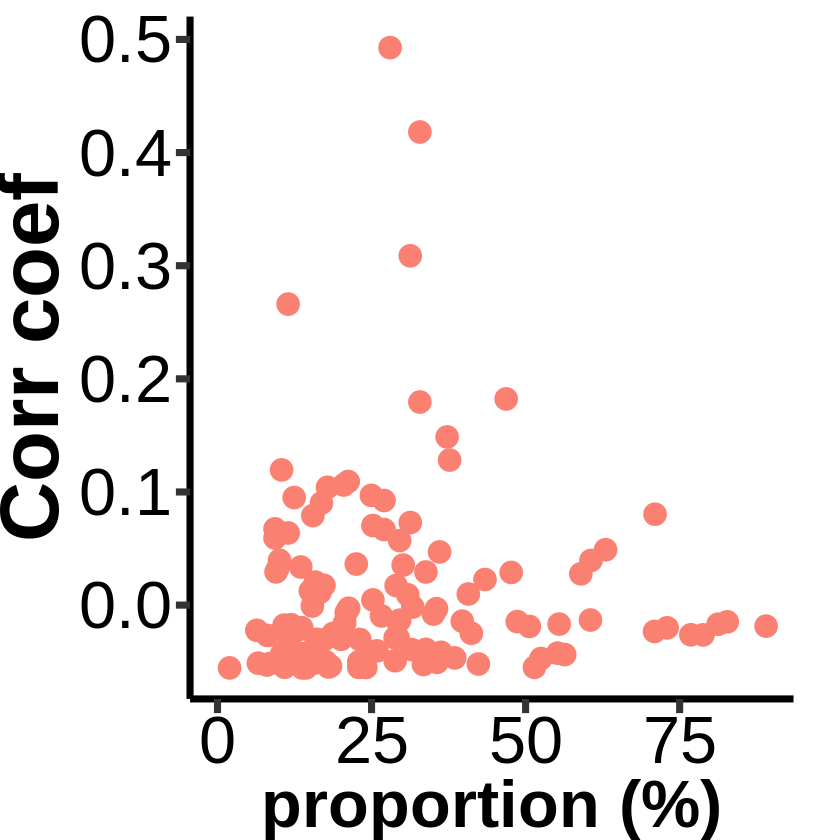

In [37]:
ggplot(Hormone,aes(x=prop,y=r_sq))+geom_point(size=6,color='salmon') +xlab("proportion (%)")+ylab("Corr coef")+theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 28, 0, 0))

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/all_hormone_receptor_female_comparisoins_Vgat_prop.pdf",width=5,height=6)

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


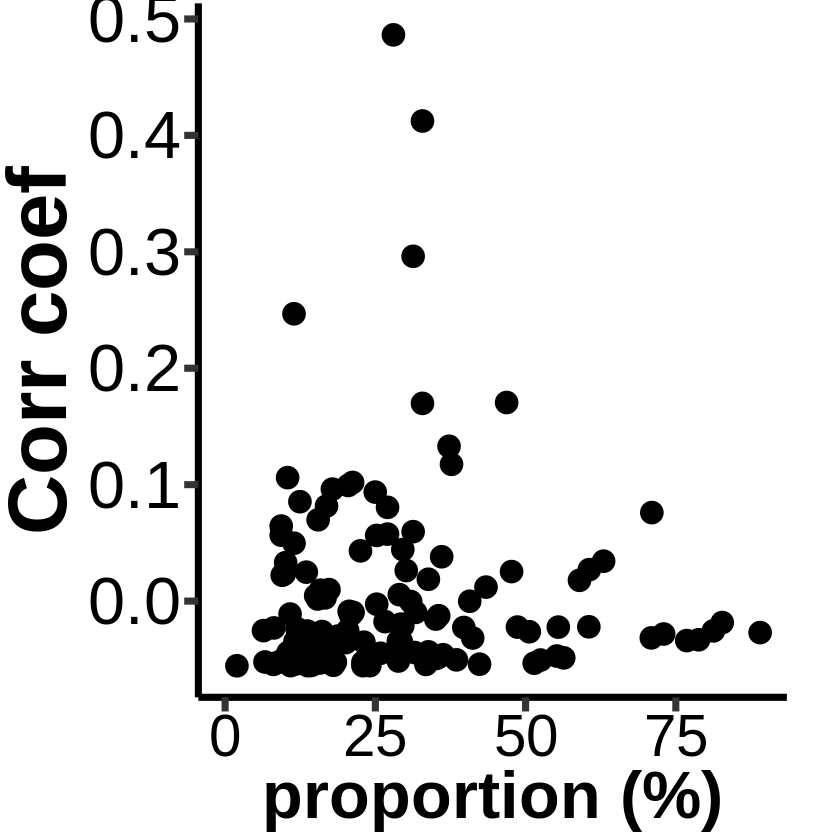

In [33]:
ggplot(Hormone,aes(x=prop,y=r_sq))+geom_point(size=6,color='black') +xlab("proportion (%)")+ylab("Corr coef")+theme(axis.text.x=element_text(size=35, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(2, 32, 5, 5))

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/allhormone_receptor_female_comparisoins_Vgat_prop_10_black_Fig1.pdf",width=6,height=6,paper="letter")

In [55]:
saveRDS(Hormone,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/femaleDEG_correlation_with_allgenes.rds")

In [62]:
size<-numeric()
for(i in 1:dim(Hormone_15)[1]){
    if(Hormone_15$r_sq[i]>0.5){size[i]<-5}else{size[i]<-1}
}

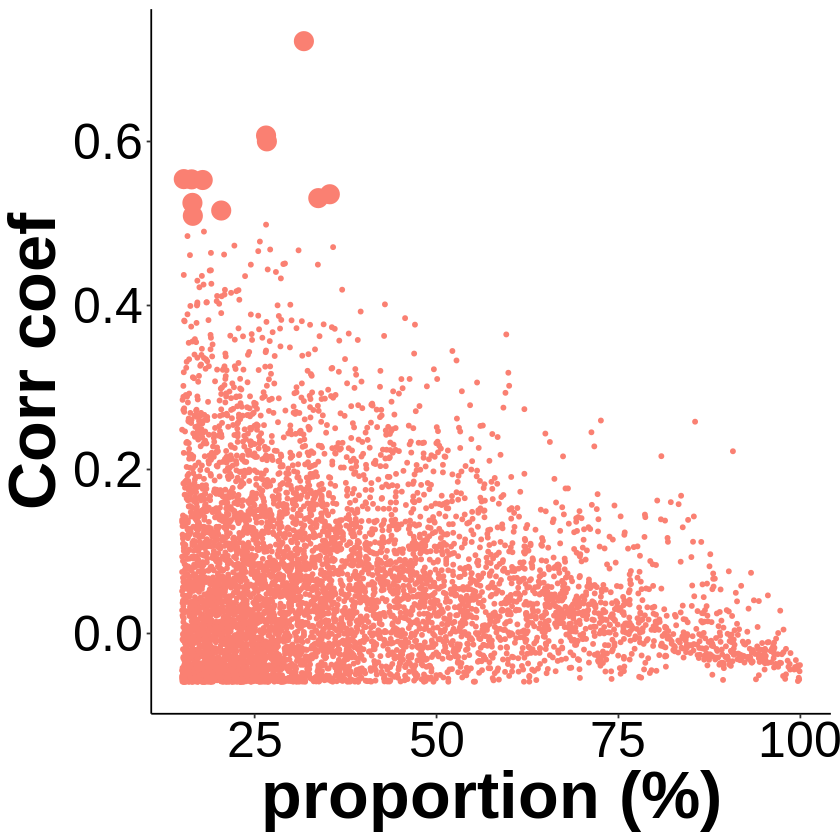

In [63]:
ggplot(Hormone_15,aes(x=prop,y=r_sq))+geom_point(size=size,color='salmon') +xlab("proportion (%)")+ylab("Corr coef")+theme(axis.text.x=element_text(size=30, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=30, hjust = 1,colour = "black"),axis.title.y=element_text(size=40,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/allgene_receptor_female_comparisoins_Vgat_prop15.pdf",width=5,height=6)

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


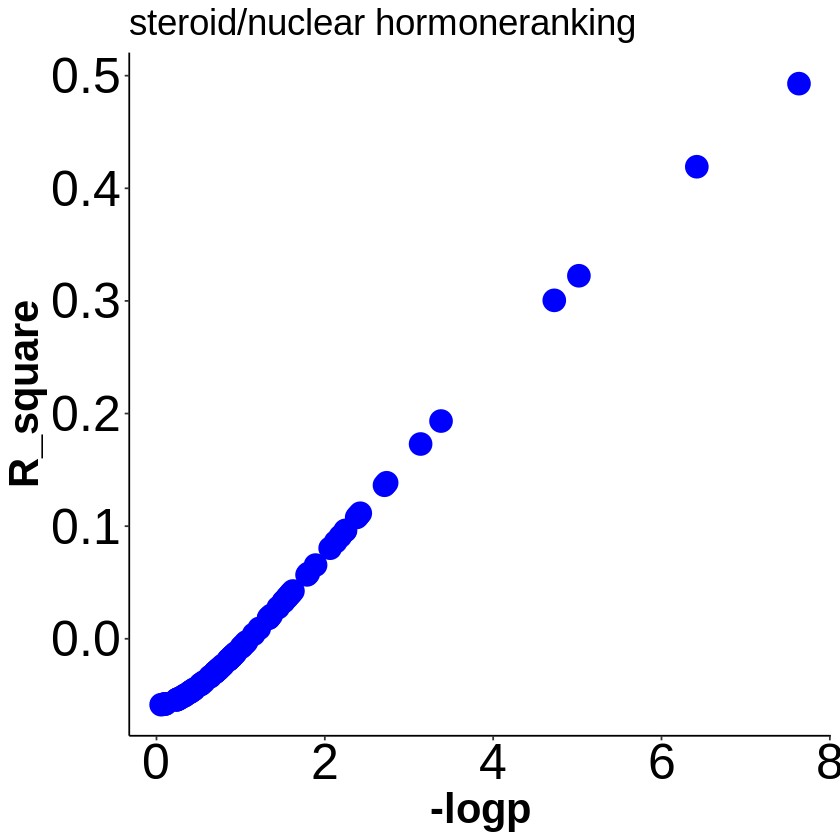

In [45]:
ggplot(Hormone,aes(x=p,y=r_sq))+geom_point(size=6,color='blue') +xlab("-logp")+ylab("R_square")+theme(axis.text.x=element_text(size=30, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=30, hjust = 1,colour = "black"),axis.title.y=element_text(size=25,face="bold"),axis.title.x=element_text(size=25,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("steroid/nuclear hormoneranking")

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/steroid_hormone_receptor_female_comparisoins_Vgat.pdf",width=10,height=10)

In [47]:
write.xlsx2(Hormone,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/steroid_hormone_receptor_female_comparisoins_Vgat_prop.xlsx")

# heatmap comparison of R squared 

In [35]:
P50M_Vgat<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/all_hormone_receptor_male_comparisoins_Vgat_prop_10.xlsx", 1,stringsAsFactors = FALSE)
P50M_Vgat$stim<-rep("P50M_Vgat",dim(P50M_Vgat)[1])
P50M_Vglu<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/Vglu/all_hormone_receptor_male_comparisoins_Vglut_prop_10.xlsx", 1,stringsAsFactors = FALSE)
P50M_Vglu$stim<-rep("P50M_Vglu",dim(P50M_Vglu)[1])
P35M_Vgat<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/P35all_hormone_receptor_male_comparisoins_Vgat_prop_10.xlsx", 1,stringsAsFactors = FALSE)
P35M_Vgat$stim<-rep("P35M_Vgat",dim(P35M_Vgat)[1])
P35M_Vglu<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/Vglu/P35Mall_hormone_receptor_male_comparisoins_Vglut_prop_10.xlsx", 1,stringsAsFactors = FALSE)
P35M_Vglu$stim<-rep("P35M_Vglu",dim(P35M_Vglu)[1])
P50F_Vgat<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/all_hormone_receptor_female_comparisoins_Vgat_prop.xlsx", 1,stringsAsFactors = FALSE)
P50F_Vgat$stim<-rep("P50F_Vgat",dim(P50F_Vgat)[1])
P50F_Vglu<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/Vglu/all_hormone_receptor_female_comparisoins_Vglu_prop.xlsx", 1,stringsAsFactors = FALSE)
P50F_Vglu$stim<-rep("P50F_Vglu",dim(P50F_Vglu)[1])
P35F_Vgat<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/P35Fall_hormone_receptor_female_comparisoins_Vgat_prop.xlsx", 1,stringsAsFactors = FALSE)
P35F_Vgat$stim<-rep("P35F_Vgat",dim(P35F_Vgat)[1])
P35F_Vglu<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/Vglu/P35Fall_hormone_receptor_female_comparisoins_Vglu_prop.xlsx", 1,stringsAsFactors = FALSE)
P35F_Vglu$stim<-rep("P35F_Vglu",dim(P35F_Vglu)[1])

In [56]:
order<-P50F_Vgat[order(-as.numeric(P50F_Vgat$r_sq)),]$gene

In [36]:
Cell_number<-rbind(P50M_Vgat,P35M_Vgat)
Cell_number<-rbind(Cell_number,P50M_Vglu)
Cell_number<-rbind(Cell_number,P35M_Vglu)
Cell_number<-rbind(Cell_number,P50F_Vgat)
Cell_number<-rbind(Cell_number,P35F_Vgat)
Cell_number<-rbind(Cell_number,P50F_Vglu)
Cell_number<-rbind(Cell_number,P35F_Vglu)

In [37]:
Cell_number<-Cell_number[!(Cell_number$gene %in% "Kdm5d"),]

In [44]:
Cell_number$r_sq<-as.numeric(Cell_number$r_sq)

In [57]:
Cell_number$gene<-factor(Cell_number$gene,order)

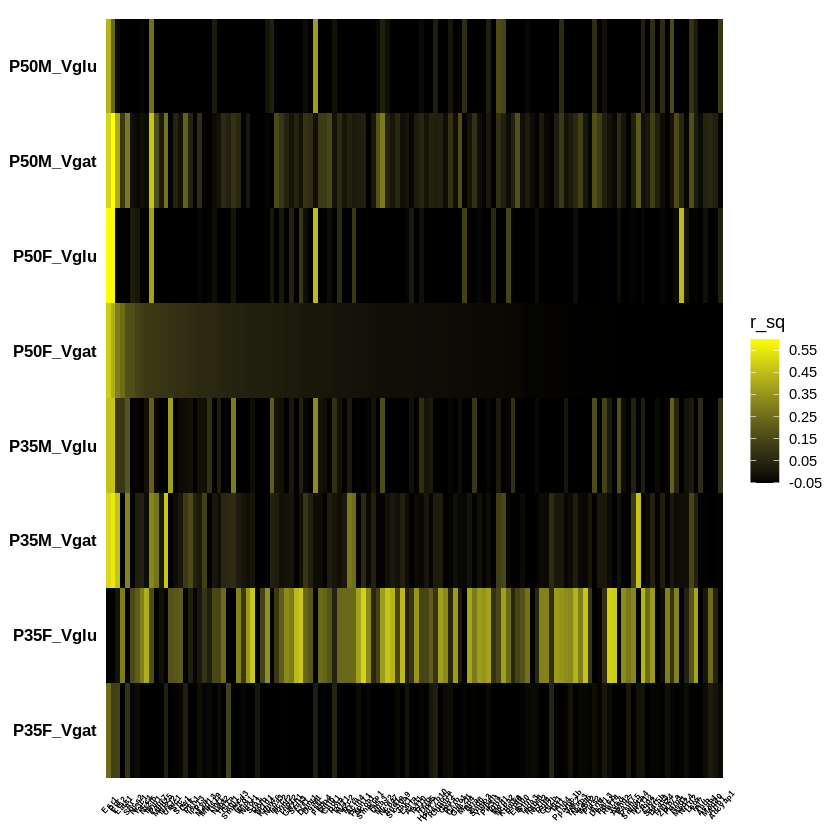

In [58]:
low<- -0.05
high<-0.60
p<-ggplot(Cell_number, aes(gene, stim))+ 
  geom_tile(aes(fill =r_sq))+ scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.1),low = "black",high = "yellow", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+theme(axis.text.x=element_text(size=5,colour = "black",angle = 48, vjust =0.77,face="bold"),axis.text.y=element_text(size=10,angle = 0, hjust =1,colour = "black",face="bold"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())
print(pp)
#ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/figures/female/DEG_heatmap_female_age_hormonegene_agegene_zscore_",low,"_",high,"_mini.pdf",sep=""),width=6,height=1.5)

In [59]:
#separate sex

In [54]:
P50F_Vgat<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/all_hormone_receptor_female_comparisoins_Vgat_prop.xlsx", 1,stringsAsFactors = FALSE)
P50F_Vgat$stim<-rep("P50F_Vgat",dim(P50F_Vgat)[1])
P50F_Vglu<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/Vglu/all_hormone_receptor_female_comparisoins_Vglu_prop.xlsx", 1,stringsAsFactors = FALSE)
P50F_Vglu$stim<-rep("P50F_Vglu",dim(P50F_Vglu)[1])
P35F_Vgat<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/P35Fall_hormone_receptor_female_comparisoins_Vgat_prop.xlsx", 1,stringsAsFactors = FALSE)
P35F_Vgat$stim<-rep("P35F_Vgat",dim(P35F_Vgat)[1])
P35F_Vglu<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/female/Vglu/P35Fall_hormone_receptor_female_comparisoins_Vglu_prop.xlsx", 1,stringsAsFactors = FALSE)
P35F_Vglu$stim<-rep("P35F_Vglu",dim(P35F_Vglu)[1])

In [55]:
order<-P50F_Vgat[order(as.numeric(P50F_Vgat$r_sq)),]$gene
Cell_number<-rbind(P50F_Vgat,P35F_Vgat)
#Cell_number<-rbind(Cell_number,P50F_Vglu)
#Cell_number<-rbind(Cell_number,P35F_Vglu)
Cell_number<-Cell_number[!(Cell_number$gene %in% "Kdm5d"),]
Cell_number$r_sq<-as.numeric(Cell_number$r_sq)
Cell_number$gene<-factor(Cell_number$gene,order)
Cell_number$p<-as.numeric(Cell_number$p)

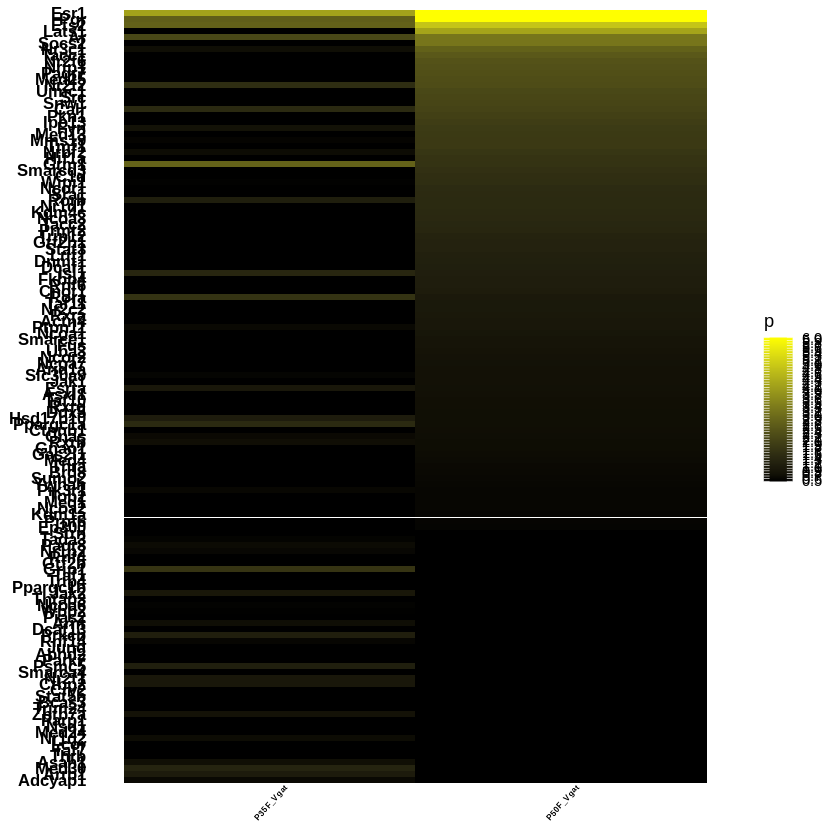

In [62]:
low<- 0.5
high<-6
p<-ggplot(Cell_number, aes(stim, gene))+ 
  geom_tile(aes(fill =p))+ scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.1),low = "black",high = "yellow", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+theme(axis.text.x=element_text(size=5,colour = "black",angle = 48, vjust =0.77,face="bold"),axis.text.y=element_text(size=10,angle = 0, hjust =1,colour = "black",face="bold"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())
print(pp)

In [ ]:
# male


In [63]:
P50M_Vgat<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/all_hormone_receptor_male_comparisoins_Vgat_prop_10.xlsx", 1,stringsAsFactors = FALSE)
P50M_Vgat$stim<-rep("P50M_Vgat",dim(P50M_Vgat)[1])
P50M_Vglu<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/Vglu/all_hormone_receptor_male_comparisoins_Vglut_prop_10.xlsx", 1,stringsAsFactors = FALSE)
P50M_Vglu$stim<-rep("P50M_Vglu",dim(P50M_Vglu)[1])
P35M_Vgat<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/P35all_hormone_receptor_male_comparisoins_Vgat_prop_10.xlsx", 1,stringsAsFactors = FALSE)
P35M_Vgat$stim<-rep("P35M_Vgat",dim(P35M_Vgat)[1])
P35M_Vglu<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/steroid hormone/male/Vglu/P35Mall_hormone_receptor_male_comparisoins_Vglut_prop_10.xlsx", 1,stringsAsFactors = FALSE)
P35M_Vglu$stim<-rep("P35M_Vglu",dim(P35M_Vglu)[1])
order<-P50M_Vgat[order(as.numeric(P50M_Vgat$r_sq)),]$gene
Cell_number<-rbind(P50M_Vgat,P35M_Vgat)
#Cell_number<-rbind(Cell_number,P50F_Vglu)
#Cell_number<-rbind(Cell_number,P35F_Vglu)
Cell_number<-Cell_number[!(Cell_number$gene %in% "Kdm5d"),]
Cell_number$r_sq<-as.numeric(Cell_number$r_sq)
Cell_number$gene<-factor(Cell_number$gene,order)
Cell_number$p<-as.numeric(Cell_number$p)

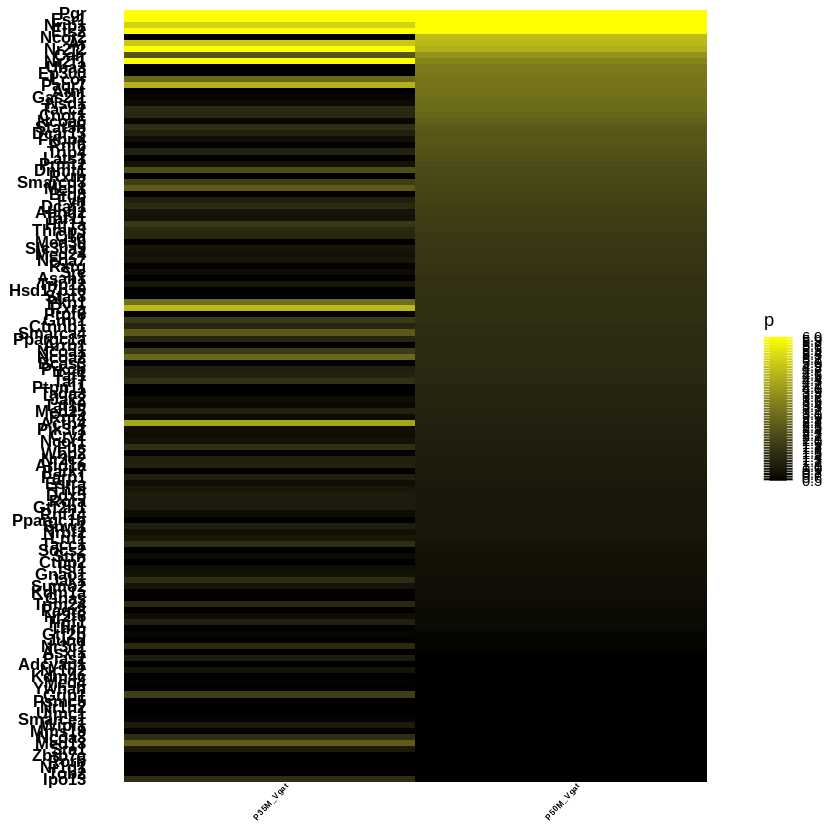

In [64]:
low<- 0.5
high<-6
p<-ggplot(Cell_number, aes(stim, gene))+ 
  geom_tile(aes(fill =p))+ scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.1),low = "black",high = "yellow", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+theme(axis.text.x=element_text(size=5,colour = "black",angle = 48, vjust =0.77,face="bold"),axis.text.y=element_text(size=10,angle = 0, hjust =1,colour = "black",face="bold"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())
print(pp)